In [235]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 

In [203]:
#os.remove('timex.txt')
time_dict = {}
x = open('timex.txt','r')
xr = x.readlines()
for i in xr:
    i = i.split(',')
    time_dict[i[0]] = i[1]

In [239]:
os.remove('IBprint4.txt')

xr = '01-Oct-2021.txt'
x = open('D:\\PythonFolder\\IBfolder\\'+xr,'r')
xp = x.readlines()
x0=0;x1=0;x2=0;x3=0;x4=0;x5=0;x6=0;x8=0

n = 0
for i in xp:
    i = i.split(' ')
    #print i
    #n = n+1
    #if n == 50:
        #break
    

    if i[0] == '0':
        x0 = i[1]
    if i[0] == '1':
        x1= i[1]
    if i[0] == '2':
        x2= i[1]
    if i[0] == '3':
        x3= i[1]
    if i[0] == '4':
        x4= i[1]
    if i[0] == '5':
        x5= i[1]
    if i[0] == '8':
        x8= i[1]
    x9 =  time_dict[i[3]]

    #print i[0], x0, x3, x1, x2, x4, x5, x8, i[3]

    xp = open('IBprint4.txt','a')
    xp.write(str(i[0]) +  ' ' + str(x0 )+  ' ' + str(x3)+  ' ' + str(x1) +  ' ' +\
        str(x2) +  ' ' + str(x4) +  ' ' + str(x5) +  ' ' + str(x8) + ' ' + str(i[3]) + ' ' + str(i[2]) + ' ' + str(x9))
    xp.close()

In [242]:
data = pd.read_csv("IBprint4.txt", sep=" ", header = None, names=['Type','Bid_V','Ask_V','Bid','Ask','Price','Qty','Vol','Time', 'Date','X','xx',''])
#data = pd.read_csv("IBprint4.txt", sep=" ", header = None)

##data['X']= data['Time'].str[:2]
data.tail()

,Type,Bid_V,Ask_V,Bid,Ask,Price,Qty,Vol,Time,Date,X,xx,
155476,2,0,656,-1.0,-1.0,132.203125,230,1967066,20:59:59,10/01/21,NaN,125959,NaN
155477,3,0,0,-1.0,-1.0,132.203125,230,1967066,20:59:59,10/01/21,NaN,125959,NaN
155478,0,0,0,-1.0,-1.0,132.203125,230,1967066,20:59:59,10/01/21,NaN,125959,NaN
155479,3,0,0,-1.0,-1.0,132.203125,230,1967066,20:59:59,10/01/21,NaN,125959,NaN
155480,5,0,0,-1.0,-1.0,132.203125,230,1967066,21:02:28,10/01/21,NaN,126228,NaN


In [243]:
dataX = data.groupby('xx').count()
dataX.tail()

,Type,Bid_V,Ask_V,Bid,Ask,Price,Qty,Vol,Time,Date,X,
xx,,,,,,,,,,,,
143951,1,1,1,1,1,1,1,1,1,1,0,0
143956,1,1,1,1,1,1,1,1,1,1,0,0
143957,5,5,5,5,5,5,5,5,5,5,0,0
143958,2,2,2,2,2,2,2,2,2,2,0,0
143959,6,6,6,6,6,6,6,6,6,6,0,0


In [244]:
#data.where(data['Type']==8)
data8=data[data.Type == 8]
data8x = data8.iloc[-300:]

In [245]:
data8['Diff'] =  data8['xx'] - data8['xx'].shift(1)

C:\Users\Ty\AppData\Local\Temp/ipykernel_7644/3203584569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data8['Diff'] =  data8['xx'] - data8['xx'].shift(1)


In [246]:
data8.tail()

,Type,Bid_V,Ask_V,Bid,Ask,Price,Qty,Vol,Time,Date,X,xx,,Diff
155454,8,162,643,132.1875,132.203125,132.187500,1,1966814,20:59:55,10/01/21,NaN,125955,NaN,1.0
155459,8,289,599,132.1875,132.203125,132.187500,17,1966831,20:59:58,10/01/21,NaN,125958,NaN,3.0
155465,8,139,656,132.1875,132.203125,132.203125,1,1966832,20:59:58,10/01/21,NaN,125958,NaN,0.0
155469,8,139,656,132.1875,132.203125,132.187500,4,1966836,20:59:59,10/01/21,NaN,125959,NaN,1.0
155473,8,139,656,132.1875,132.203125,132.203125,230,1967066,20:59:59,10/01/21,NaN,125959,NaN,0.0


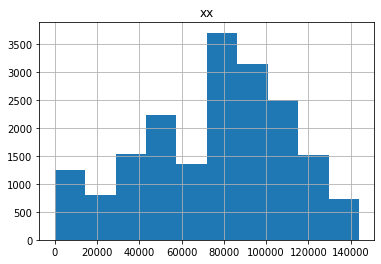

In [247]:
data8.hist(column='xx');

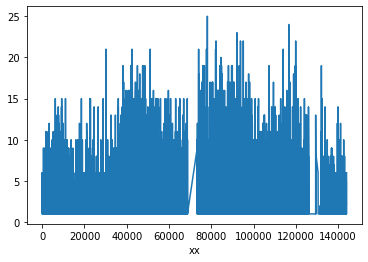

In [248]:
gfg = pd.Series(dataX['Price'])
  
gfg.plot()
plt.show()

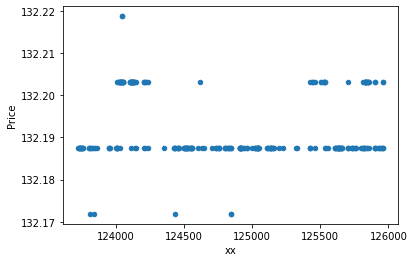

In [249]:
data8x.plot(x ='xx', y='Price', kind = 'scatter')
plt.show()

In [250]:
data8['Price']

9         131.921875
14        131.921875
22        131.921875
104       131.890625
112       131.890625
             ...    
155454    132.187500
155459    132.187500
155465    132.203125
155469    132.187500
155473    132.203125
Name: Price, Length: 18819, dtype: float64

In [251]:
data8.iloc[-5:]

,Type,Bid_V,Ask_V,Bid,Ask,Price,Qty,Vol,Time,Date,X,xx,,Diff
155454,8,162,643,132.1875,132.203125,132.187500,1,1966814,20:59:55,10/01/21,NaN,125955,NaN,1.0
155459,8,289,599,132.1875,132.203125,132.187500,17,1966831,20:59:58,10/01/21,NaN,125958,NaN,3.0
155465,8,139,656,132.1875,132.203125,132.203125,1,1966832,20:59:58,10/01/21,NaN,125958,NaN,0.0
155469,8,139,656,132.1875,132.203125,132.187500,4,1966836,20:59:59,10/01/21,NaN,125959,NaN,1.0
155473,8,139,656,132.1875,132.203125,132.203125,230,1967066,20:59:59,10/01/21,NaN,125959,NaN,0.0


In [252]:
#dataXX = data8[data8.xx>8000]  and data8[data8.xx<13543] 
#dataXX = data8[data8['xx'].between(1, 13543)]
#dataXX = data8[(data8['xx'] >= 99) & (data8['xx'] <= 13543)]
#data8[data8["xx"].between(86806, 86999)]


,Type,Bid_V,Ask_V,Bid,Ask,Price,Qty,Vol,Time,Date,X,xx,,Diff
102143,8,955,3186,132.015625,132.031250,132.015625,4,1159515,14:28:07,10/01/21,NaN,86807,NaN,2.0
102149,8,690,3583,132.015625,132.031250,132.031250,1,1159516,14:28:08,10/01/21,NaN,86808,NaN,1.0
102157,8,824,3272,132.015625,132.031250,132.015625,1,1159517,14:28:11,10/01/21,NaN,86811,NaN,3.0
102163,8,2246,1995,132.015625,132.031250,132.015625,3,1159520,14:28:13,10/01/21,NaN,86813,NaN,2.0
102171,8,1896,2060,132.015625,132.031250,132.015625,3,1159555,14:28:18,10/01/21,NaN,86818,NaN,5.0
102176,8,1896,2061,132.015625,132.031250,132.031250,20,1159576,14:28:18,10/01/21,NaN,86818,NaN,0.0
102182,8,1627,2287,132.015625,132.031250,132.015625,1,1159577,14:28:19,10/01/21,NaN,86819,NaN,1.0
102192,8,1152,2785,132.015625,132.031250,132.031250,4,1159581,14:28:23,10/01/21,NaN,86823,NaN,4.0
102200,8,972,3032,132.015625,132.031250,132.015625,50,1159631,14:28:25,10/01/21,NaN,86825,NaN,2.0
102204,8,1179,2937,132.015625,132.031250,132.015625,1,1159632,14:28:26,10/01/21,NaN,86826,NaN,1.0


In [253]:
data.to_json(r'D:\jsonFolder\x.json')

In [255]:
xz = pd.read_json(r'D:\jsonFolder\x.json')

In [264]:
with open(r'D:\jsonFolder\x.json') as f:
  data = json.load(f)

In [270]:
print (data['xx'] == '86958')

False
